<h3>Project Description</h3>

<b>InsaidTelecom</b>, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.
Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences

<h3>Objective</h3>

Build a dashboard to understand users demographic characteristics based on their mobile usage, geolocation, and mobile device properties.

<h3>Import Tools</h3>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h3>Load Data</h3>

In [15]:
gender_age_train_df = pd.read_csv("gender_age_train.csv")
phone_brand_device_model_df = pd.read_csv("phone_brand_device_model.csv")
events_df = pd.read_csv("events_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h4>GenderAgeTrain Data</h4>

In [7]:
gender_age_train_df.head(3)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38


<h5>Data Description</h5>

| Column Name                    | Description                                                    |
| -------------------------------|:--------------------------------------------------------------:| 
| device_id                      | device id of the user                                          | 
| gender                         | gender of the user                                             | 
| age                            | age of the user                                                | 
| group                          | age group of the user                                          | 


<h5> info()</h5>

In [4]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


<b>Observations:</b>

    1. No Missing Values

<h5>describe()</h5>

In [5]:
gender_age_train_df.describe(include='all')

,device_id,gender,age,group
count,7.464500e+04,74645,74645.000000,74645
unique,NaN,2,NaN,12
top,NaN,M,NaN,M23-26
freq,NaN,47904,NaN,9605
mean,-7.491354e+14,NaN,31.410342,NaN
std,5.327150e+18,NaN,9.868735,NaN
min,-9.223067e+18,NaN,1.000000,NaN
25%,-4.617367e+18,NaN,25.000000,NaN
50%,-1.841362e+16,NaN,29.000000,NaN
75%,4.636656e+18,NaN,36.000000,NaN


<b>Observations:</b>
    
    1. Out of 74645 users - users with gender 'M' are 64.17%
    2. users minimum age - 1 year, Average age - 32 years and maximum age - 96 years
    3. Male users are more in the age group of 23-26 

In [6]:
gender_age_train_df.columns

Index(['device_id', 'gender', 'age', 'group'], dtype='object')

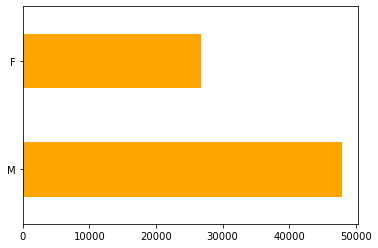

In [7]:
gender_age_train_df.gender.value_counts()
gender_age_train_df.gender.value_counts().plot(kind='barh',color='orange')

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

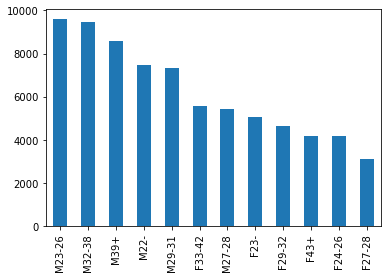

In [8]:
gender_age_train_df.group.value_counts().plot(kind='bar')
gender_age_train_df.group.value_counts()

In [9]:
gender_age_train_df.isna().sum()  #- No Missing Values


device_id    0
gender       0
age          0
group        0
dtype: int64

<h4>phone-brand-device-model Data</h4>

In [10]:
phone_brand_device_model_df.head(3)

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s


<h5>Data Description</h5>

| Column Name                    | Description                                                    |
| -------------------------------|:--------------------------------------------------------------:| 
| device_id                      | device id of the user                                          | 
| phone_brand                    | phone brand of the user                                        | 
| device_model                   | device model of the user                                       | 

In [11]:
#- Convert Phone_Brand to Brand English
brand_dict = {
    '华为':'Huawei','小米':'Xiaomi','三星':'Samsung','vivo':'vivo','OPPO':'OPPO','魅族':'Meizu',
    '酷派':'Coolpad','乐视':'LeEco','联想 ':'Lenovo','HTC':'HTC'
}    

In [12]:
phone_brand_device_model_df = phone_brand_device_model_df.replace({'phone_brand':brand_dict})

<h5>info()</h5>

In [13]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


<b>Observations:</b>
    
    1. No Missing values

<h5>describe()</h5>

In [14]:
phone_brand_device_model_df.describe(include='all')

,device_id,phone_brand,device_model
count,8.772600e+04,87726,87726
unique,NaN,116,1467
top,NaN,Xiaomi,红米note
freq,NaN,21645,3500
mean,-5.212557e+15,NaN,NaN
std,5.330157e+18,NaN,NaN
min,-9.223322e+18,NaN,NaN
25%,-4.623331e+18,NaN,NaN
50%,-3.109802e+16,NaN,NaN
75%,4.635194e+18,NaN,NaN


<b>Observations:</b>
    
    1. 116 unique phone brands are used by the users in India
    2. Top used phone brand = Xiaomi
    3. most used model  - 红米note
    4. 1467 unique device models 

In [15]:
phone_brand_device_model_df.isna().sum() #- No missing values

device_id       0
phone_brand     0
device_model    0
dtype: int64

红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
Name: device_model, dtype: int64

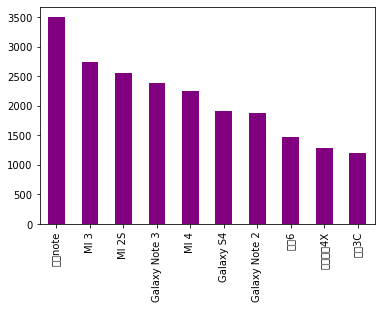

In [16]:
phone_brand_device_model_df.device_model.value_counts().head(10).plot(kind='bar',color='purple')
phone_brand_device_model_df.device_model.value_counts().head(10)

Xiaomi     21645
Samsung    19211
Huawei     15181
vivo        7596
OPPO        6717
Meizu       5531
Coolpad     3979
HTC         1272
Lenovo       982
LeEco        841
Name: phone_brand, dtype: int64

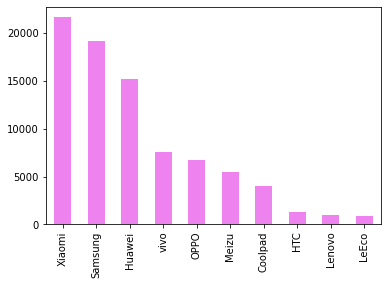

In [17]:
phone_brand_device_model_df.phone_brand.value_counts().head(10).plot(kind='bar',color='violet')
phone_brand_device_model_df.phone_brand.value_counts().head(10)

<h4>Events Data</h4>

In [16]:
events_df.head(3)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi


<h5>Data Description</h5>

| Column Name       | Description                                  |
| ------------------|:--------------------------------------------:| 
| event_id          | user event_id                                | 
| device_id         | device id of the user                        | 
| timestamp         | when the user is using the mobile            | 
| longitude         | user mobile longitude                        | 
| latitude          | user mobile latitude                         | 
| city              | user city                                    | 
| state             | user state                                   | 

In [13]:
events_df.state.fillna('',inplace=True)
events_df.longitude.fillna('',inplace=True)
events_df.latitude.fillna('',inplace=True)

In [17]:
#- convert timestamp to datetime type
events_df['timestamp'] = pd.to_datetime(events_df.timestamp, format='%Y-%m-%d %H:%M:%S')

<IPython.core.display.Javascript object>

In [18]:
#- Convert device_id from exponential values to int type values to match data between dataframes
events_df['device_id'] = events_df['device_id'].astype(pd.Int64Dtype())

<IPython.core.display.Javascript object>

In [19]:
#- check for missing values
events_df.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

<b>Observations:</b>
    
    1. Missing values found in the columns - device_id, longitude, latitude and state

<h5>Fill Missing values</h5>

<h6>state</h6>

In [20]:
events_df[events_df.state.isna()].city.unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [21]:
missing_state_city_dict = {
    'Pune' : 'Maharashtra', 'Visakhapatnam' : 'AndhraPradesh', 'Indore' : 'MadhyaPradesh',
    'Chennai' : 'TamilNadu', 'Delhi' : 'Delhi', 'Channapatna' : 'Karnataka',
    'Jaipur' : 'Rajasthan', 'Gangarampur' : 'WestBengal', 'Arambagh' : 'WestBengal'
}

In [88]:
events_df.state.fillna('',inplace=True)

In [89]:
#- Extracting misisng state rows into a seperate dataframe and fill missing values 
#- if apply method executed on events_df (32L records) takes more time 
events_df_state_not_null = events_df[events_df.state != ""]
events_df_state_null = events_df[events_df.state == ""]
print("events_df_state_not_null rows = ",events_df_state_not_null.shape[0])
print("events_df_state_null rows = ",events_df_state_null.shape[0])

events_df_state_not_null rows =  3252573
events_df_state_null rows =  377


In [90]:
def replace_missing_state(row):
    if row.state == "":
        return (missing_state_city_dict[row.city])
    else:
        return row.state

In [91]:
events_df_state_null['state'] = events_df_state_null[['state','city']].apply(replace_missing_state,axis=1)

In [92]:
#- concatnate dataframes
events_df = events_df_state_not_null.append(events_df_state_null)
events_df.shape

(3252950, 7)

<h6>Longitude and Latitude</h6>

In [93]:
#- correlate the timestamp to know the realistic event happend 
#- check if the device id has mpping to multiple cities 
#- if not merge 
#- else 
#-   find the realistic mapping 
#- closest timestamp should be applied 
long_missing = events_df[events_df.longitude == ""]
long_present = events_df[events_df.longitude != ""]
print("long_missing rows = ",long_missing.shape[0])
print("long_present rows = ",long_present.shape[0])

long_missing rows =  423
long_present rows =  3252527


In [117]:
d1 = long_present[['device_id','longitude','latitude']]

In [129]:
merge_d1 = long_missing.merge(d1,left_on='device_id',right_on='device_id',how='left')
merge_d1.drop_duplicates(inplace=True)
merge_d1.drop(['longitude_x','latitude_x'],axis=1,inplace=True)
merge_d1.rename(columns={"longitude_y": "longitude", "latitude_y": "latitude"},inplace=True)
long_missing = merge_d1[['event_id','device_id','timestamp','longitude','latitude','city','state']]

In [131]:
#- concatnate dataframes
events_df = long_present.append(long_missing)
events_df.shape

(3252950, 7)

<h6>Device Id</h6>

In [138]:
device_id_present = events_df[events_df.device_id.notna()]
device_id_missing = events_df[events_df.device_id.isna()]
print("device_id_present rows = ",device_id_present.shape[0])
print("device_id_missing rows = ",device_id_missing.shape[0])

device_id_present rows =  3252497
device_id_missing rows =  453


In [144]:
d2 = device_id_present[['device_id','longitude','latitude']]

In [146]:
merge_d2 = device_id_missing.merge(d2,left_on=['longitude','latitude'],right_on=['longitude','latitude'],how='left')
merge_d2.drop_duplicates(inplace=True)
merge_d2.drop('device_id_x',axis=1,inplace=True)
merge_d2.rename(columns={"device_id_y": "device_id"},inplace=True)
device_id_missing = merge_d2[['event_id','device_id','timestamp','longitude','latitude','city','state']]

In [147]:
device_id_missing.device_id.isna().sum()

0

In [148]:
#- concatnate dataframes
events_df = device_id_present.append(device_id_missing)
events_df.shape

(3252950, 7)

<h5>info()</h5>

In [151]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 693861
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  Int64         
 2   timestamp  datetime64[ns]
 3   longitude  object        
 4   latitude   object        
 5   city       object        
 6   state      object        
dtypes: Int64(1), datetime64[ns](1), int64(1), object(4)
memory usage: 201.6+ MB


<h5>describe()</h5>

In [152]:
events_df.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,3.252950e+06,3.252950e+06,3252950,3.252950e+06,3.252950e+06,3252950,3252950
unique,NaN,NaN,588126,6.009500e+04,6.018500e+04,933,32
top,NaN,NaN,2016-05-03 10:00:03,8.035980e+01,1.312817e+01,Delhi,Delhi
freq,NaN,NaN,43,3.342600e+04,3.342600e+04,744276,751797
first,NaN,NaN,2016-04-30 23:52:24,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-05-08 00:00:08,NaN,NaN,NaN,NaN
mean,1.626476e+06,1.015168e+17,NaN,NaN,NaN,NaN,NaN
std,9.390459e+05,5.316845e+18,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,-9.222957e+18,NaN,NaN,NaN,NaN,NaN
25%,8.132382e+05,-4.540611e+18,NaN,NaN,NaN,NaN,NaN


<b>Observations:</b>
    
    1. more number of events(43) seen on 2016-05-03 10:00:03
    2. more number of events are from Delhi out of 32 unique states and 933 unique cities

Delhi            744276
Chennai          366875
Pune             317276
Mumbai           285246
Visakhapatnam    235772
Indore           189804
Jaipur           157046
Calcutta         122381
Bangalore         49939
Hyderabad         13549
Name: city, dtype: int64

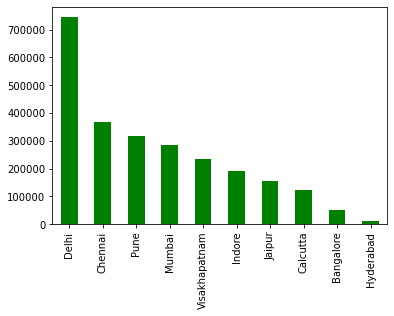

In [153]:
events_df.city.value_counts().head(10).plot(kind='bar',color='green')
events_df.city.value_counts().head(10)

Delhi                       751797
Maharashtra                 677168
TamilNadu                   436329
AndhraPradesh               321379
MadhyaPradesh               232741
Rajasthan                   196410
WestBengal                  196203
Karnataka                    99072
UttarPradesh                 94750
Gujarat                      42881
Bihar                        35472
Punjab                       26195
Kerala                       23148
Haryana                      21053
Jharkhand                    18060
Orissa                       15904
Telangana                    12784
Assam                        12021
Chhattisgarh                  9754
Uttaranchal                   7720
JammuandKashmir               5385
Goa                           3250
Nagaland                      2298
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Manipur             

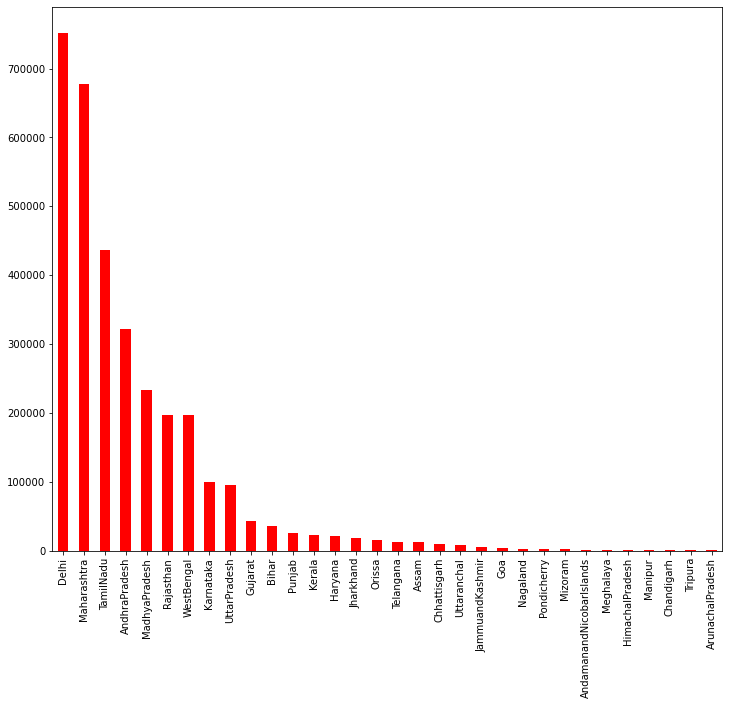

In [154]:
plt.figure(figsize=(12,10))
events_df.state.value_counts().plot(kind='bar',color='red')
events_df.state.value_counts()

<h3>Analysis on Delhi State</h3>

In [164]:
#- data frames gender_age_train_df, phone_brand_device_model_df, events_df
#- Get Delphi users info 
delhi_events_df = events_df[events_df.state == "Delhi"]
print("delhi_events_df rows = ",delhi_events_df.shape[0])

delhi_events_df rows =  751797


In [165]:
#- merge gender_age_train_df and phone_brand_device_model_df
print(gender_age_train_df.shape)
print(phone_brand_device_model_df.shape)

(74645, 4)
(87726, 3)


In [185]:
level1 = phone_brand_device_model_df.merge(gender_age_train_df,left_on='device_id',right_on='device_id',how='left')

In [186]:
level1.head()

,device_id,phone_brand,device_model,gender,age,group
0,1877775838486905855,vivo,Y13,NaN,NaN,NaN
1,-3766087376657242966,小米,V183,NaN,NaN,NaN
2,-6238937574958215831,OPPO,R7s,NaN,NaN,NaN
3,8973197758510677470,三星,A368t,NaN,NaN,NaN
4,-2015528097870762664,小米,红米Note2,NaN,NaN,NaN


In [198]:
level2 = delhi_events_df.merge(level1,left_on='device_id',right_on='device_id')

In [199]:
level2

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.2257,28.7301,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
1,1355198,2973347786994914304,2016-05-01 01:35:45,77.2257,28.7301,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
2,1630972,2973347786994914304,2016-05-03 00:07:34,77.2257,28.7301,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
3,2732453,2973347786994914304,2016-05-01 06:15:59,77.2257,28.7301,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
4,1562542,2973347786994914304,2016-05-01 20:34:19,77.2257,28.7301,Delhi,Delhi,优米,UIMI3,M,35.0,M32-38
...,...,...,...,...,...,...,...,...,...,...,...,...
2323,504374,-18969145338053044,2016-05-06 08:57:27,77.2849,28.7565,Delhi,Delhi,中国移动,A1,M,32.0,M32-38
2324,838753,-18969145338053044,2016-05-06 08:54:26,77.2849,28.7565,Delhi,Delhi,中国移动,A1,M,32.0,M32-38
2325,812482,-18969145338053044,2016-05-06 09:02:34,77.2849,28.7565,Delhi,Delhi,中国移动,A1,M,32.0,M32-38
2326,2576907,-18969145338053044,2016-05-06 08:54:50,77.2849,28.7565,Delhi,Delhi,中国移动,A1,M,32.0,M32-38


In [194]:
level2.isna().sum()

device_id            0
phone_brand     749469
device_model    749469
gender          749469
age             749469
group           749469
event_id             0
timestamp            0
longitude            0
latitude             0
city                 0
state                0
dtype: int64

In [200]:
level2['phone_brand'].unique()

array(['优米', '三星', 'vivo', 'OPPO', '酷派', '魅族', '华为', '乐视', 'HTC', '小米',
       '中国移动'], dtype=object)

In [201]:
brand_eng_map = {
    '优米':'Youmeco',
    '三星':'Samsung',
    '酷派':'Coolpad',
    '魅族':'Meizu',
    '华为':'Huawei',
    '乐视':'Letv',
    '小米':'Xiaomi',
    '中国移动':'ChinaMobile'
}

In [195]:
gender_age_train_df[gender_age_train_df.device_id == 6364206277211502592]

,device_id,gender,age,group
